Text(0.5, 1.0, 'Original Image')

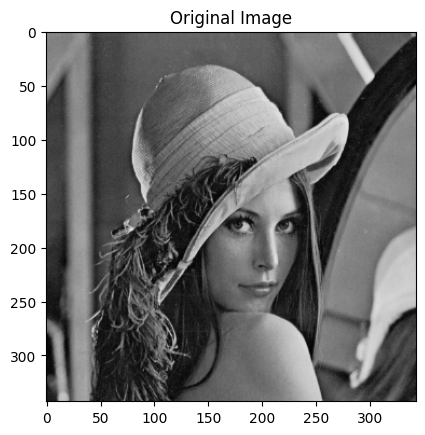

In [ ]:
#Read the image.
import cv2
import matplotlib.pyplot as plt

image_path = '/content/Lena-original-gray.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

plt.imshow(image)
plt.title('Original Image')


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(image_path).convert('L')
data = np.array(image)

data_flattened = data.flatten()
print(data_flattened)


[255 255 255 ...  66  73  65]


In [ ]:
# Center and standardize the data
mean = np.mean(data_flattened)
std_dev = np.std(data_flattened)
data_centered = data_flattened - mean
data_standardized = data_centered / std_dev

# Reshape standardized data back to original 2D shape
data_standardized_2d = data_standardized.reshape(data.shape)

# For grayscale image data, covariance matrix is just the variance in this case
covariance_matrix = np.var(data_standardized_2d)

print("Covariance Matrix (Variance):", covariance_matrix)

Covariance Matrix (Variance): 1.0000000000000004


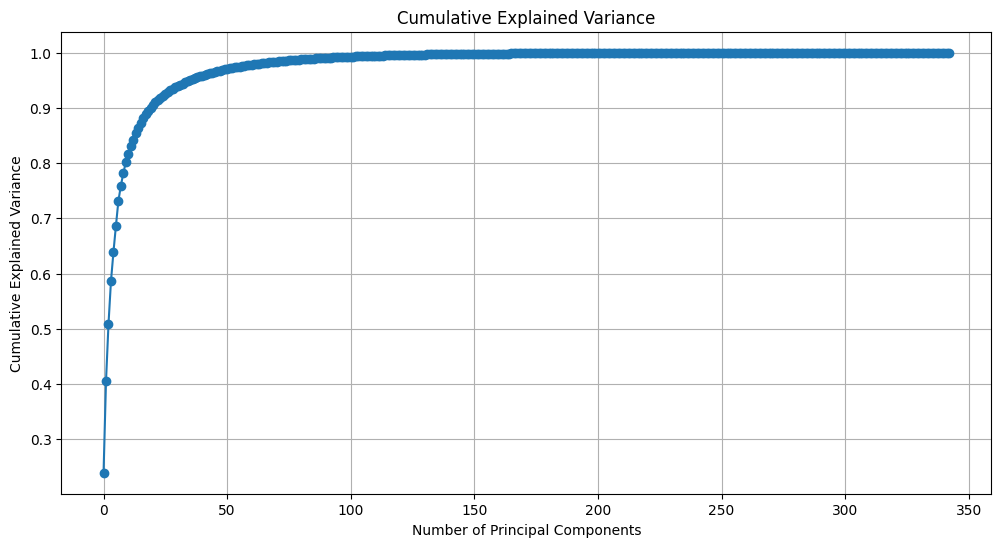

In [ ]:
data_flattened_2d = data_standardized_2d.reshape(-1, data.shape[1])
cov_matrix = np.cov(data_flattened_2d.T)

# Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Cumulative Sum Plot
cumulative_explained_variance = np.cumsum(eigenvalues_sorted) / np.sum(eigenvalues_sorted)
plt.figure(figsize=(12, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


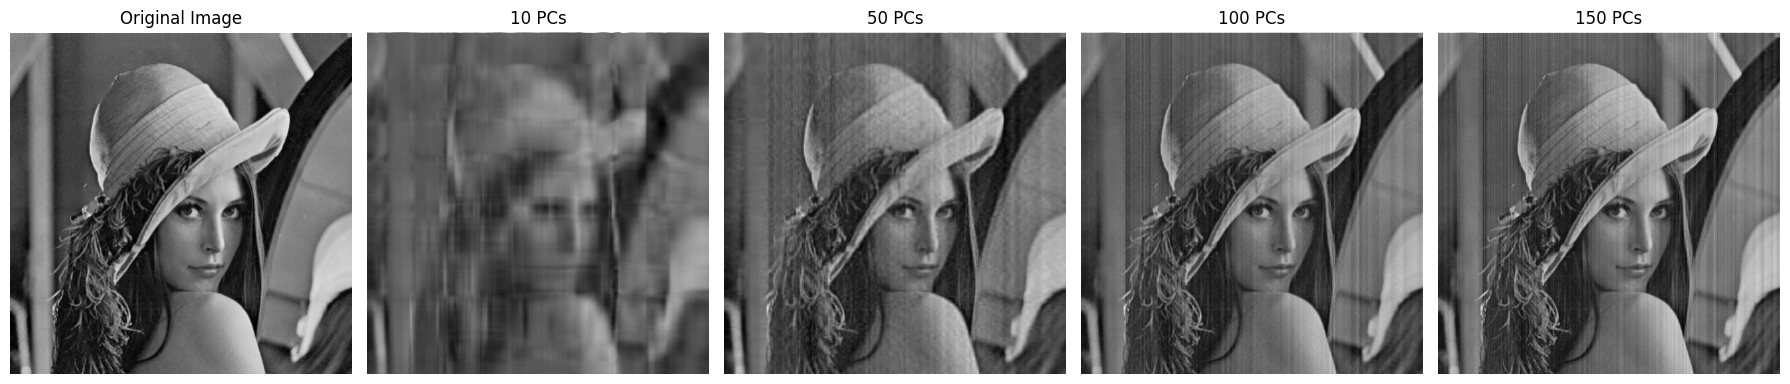

MSE with 10 Principal Components: 0.2581942795084471
MSE with 50 Principal Components: 0.1023883368705389
MSE with 100 Principal Components: 0.06729489372021309
MSE with 150 Principal Components: 0.048909070300655194


In [ ]:
# Choose top k principal components
k_values = [10, 50, 100, 150]
reconstructed_images = []

for k in k_values:
    # Select top k eigenvectors
    top_k_eigenvectors = eigenvectors_sorted[:, :k]

    # Project the original data onto the top k eigenvectors
    data_projected = np.dot(data_flattened_2d, top_k_eigenvectors)

    # Reconstruct the data
    data_reconstructed = np.dot(data_projected, top_k_eigenvectors.T)

    # Reshape the reconstructed data to original image shape
    data_reconstructed_image = data_reconstructed.reshape(data.shape)
    reconstructed_images.append(data_reconstructed_image)

plt.figure(figsize=(18, 6))

# Display the original image
plt.subplot(1, len(k_values) + 1, 1)
plt.title("Original Image")
plt.imshow(data, cmap='gray')
plt.axis('off')

# Display reconstructed images
for i, (k, img) in enumerate(zip(k_values, reconstructed_images), start=2):
    plt.subplot(1, len(k_values) + 1, i)
    plt.title(f"{k} PCs")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Evaluate the compression by comparing images
for i, k in enumerate(k_values):
    original_image = data_standardized_2d
    compressed_image = reconstructed_images[i]

    # Compute Mean Squared Error (MSE) as an evaluation metric
    mse = np.mean((original_image - compressed_image) ** 2)
    print(f'MSE with {k} Principal Components: {mse}')